In [1]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import norm
from PIL import Image

j = complex(0,1)

# Properties of the Experiment

If we use numpy's discrete fft transform function, the frequencies measured will be sampled from $0$ to $X$ with step size $\Delta k=1/X$:

$$\vec{k}=\left[0, 1/X, 2/X, ...,  1\right] $$

In fourier optics, the projection of the relationship between the $k$'s of the fourier transform and <i> the actual displacement on the screen </i> is given by

$$ x = \frac{\lambda f}{2 \pi}k \implies \Delta x = \frac{\lambda f}{2 \pi}\Delta k$$

where $\lambda$ is the wavelength of the light and $f$ is the focal length of the lens. It follows that the spacing on the screen is given by

$$\Delta x =  \frac{\lambda f}{2 \pi X}$$

In other words, the points of the image $\Delta x_{im}$ on the back focal plane are related to the points from the object $\Delta x_{ob}$ on the front focal plane by

$$\Delta x_{im} = \frac{\lambda f}{2 \pi X} \Delta x_{ob} \equiv \alpha \Delta x_{ob}$$

In [2]:
lam = 655e-9
f = 200e-3

Pix_Size = 6.45e-6
X_Pixels = 1360
Y_Pixels = 1024

In [3]:
Pix_Size

6.45e-06

In [4]:
def get_image_dimensions(image):
    x_width, y_width = image.shape
    x_arr = np.linspace(1, x_width, x_width) * (X_Pixels/x_width)*Pix_Size
    y_arr = np.linspace(1, y_width, y_width) * (Y_Pixels/y_width)*Pix_Size
    
    return y_arr, x_arr, image

def get_simulation_dimensions(f_trans):
    kx_width, ky_width = f_trans.shape
    
    del_kx = kx_width/(X_Pixels*Pix_Size)
    del_ky = ky_width/(Y_Pixels*Pix_Size)
    kx_arr = np.linspace(1, kx_width, kx_width) *((lam*f)/(2*np.pi))*del_kx
    ky_arr = np.linspace(1, ky_width, ky_width) *((lam*f)/(2*np.pi))*del_ky
    
    return ky_arr, kx_arr, f_trans

Go to 0.5 bc don't need negative values -0.5 to 0.

In [5]:
def get_simulation_dimensions(f_trans):
    kx_width, ky_width = f_trans.shape
    
    del_x = (X_Pixels*Pix_Size)/kx_width
    del_y = (Y_Pixels*Pix_Size)/ky_width
    
    kx_arr = np.linspace(0, 0.5, kx_width)*(lam*f/del_x)
    ky_arr = np.linspace(0, 0.5, ky_width)*(lam*f/del_y)
    
    return ky_arr, kx_arr, f_trans

# Open Image

In [7]:
im = Image.open("Square_Aperture/Image_1_#001.bmp").convert('L')
p = np.array(im)
p = p/p.sum()

# Plot Image

<IPython.core.display.Javascript object>


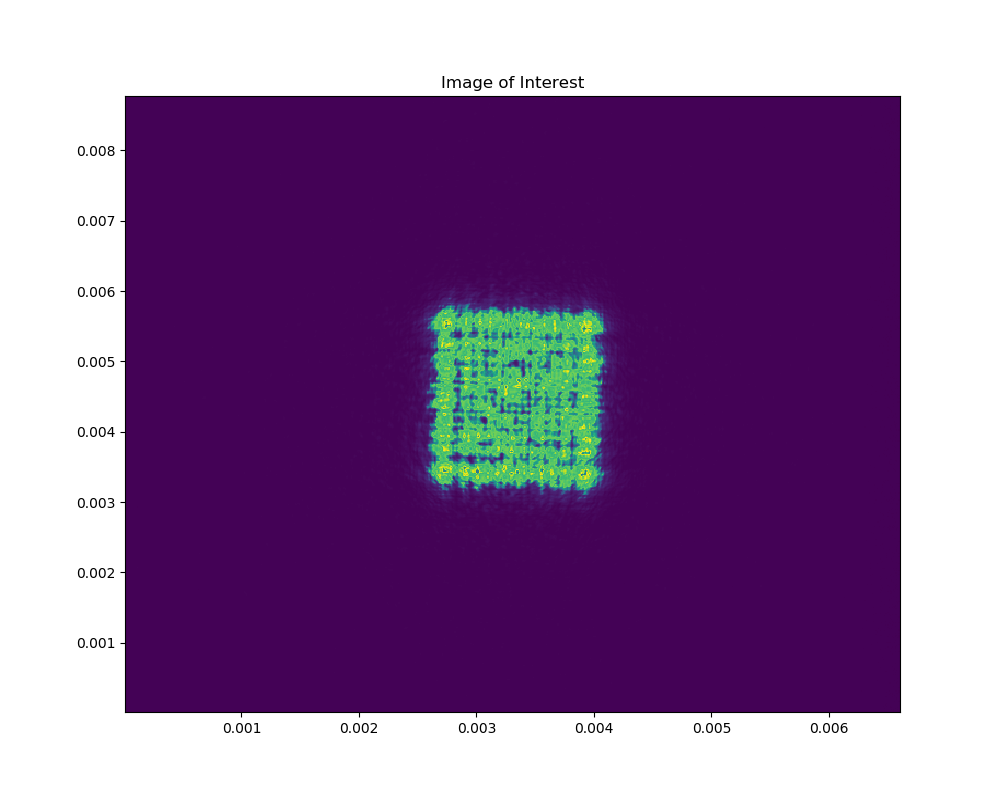

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

y, x, z = get_image_dimensions(p)
axes.pcolor(y, x, z)
axes.set_title('Image of Interest')

plt.show()

<IPython.core.display.Javascript object>


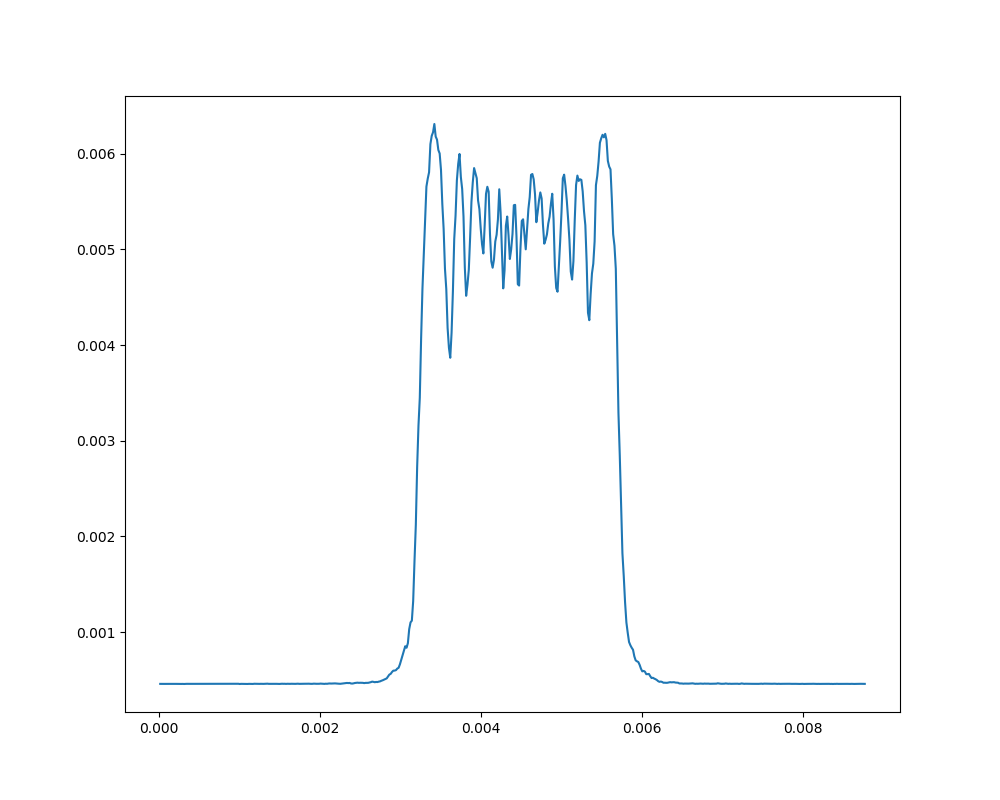

In [9]:
hx, hy = z.sum(axis=0), z.sum(axis=1)

fig, axes = plt.subplots(1, 1, figsize=(10,8))

axes.plot(x, hy)

# Simulate Fourier Transform on Image

In [10]:
g=np.abs(np.fft.fft2(p))
g = g/g.sum()
G = np.fft.fftshift( g )

# Open Actual Fourier Transform on Image

In [11]:
im2 = Image.open("Square_Aperture/Fourier_1_#001.bmp").convert('L')
p2 = np.array(im2)
p2 = p2/p2.sum()

# Plot Simulated vs Observed

<IPython.core.display.Javascript object>


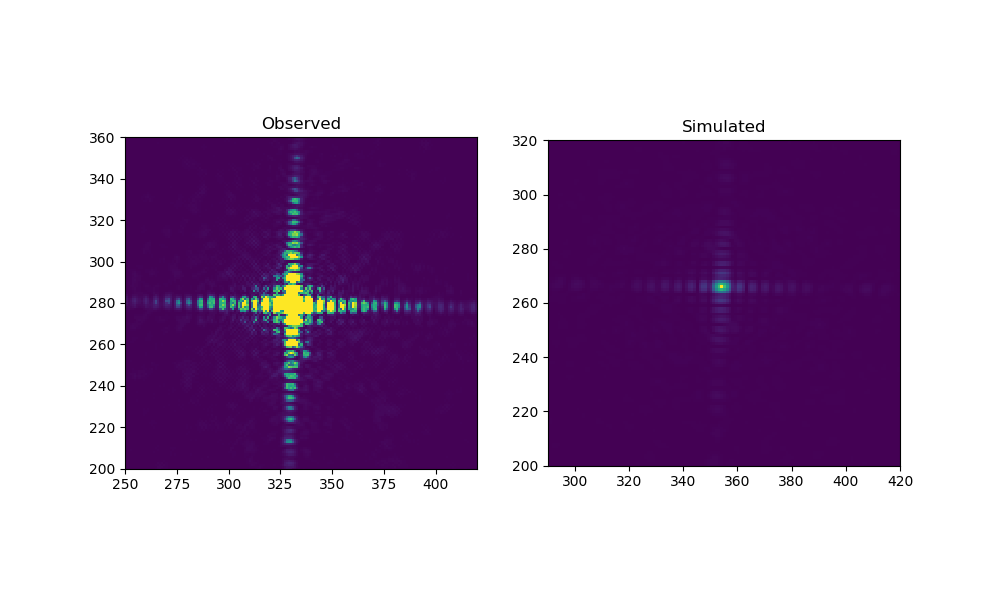

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))

axes[0].imshow(p2)
axes[1].imshow(np.abs(G))

axes[0].set_xlim(250, 420)
axes[0].set_ylim(200, 360)
axes[0].set_title('Observed')

axes[1].set_title('Simulated')
axes[1].set_xlim(290, 420)
axes[1].set_ylim(200, 320)

plt.show()

# Plot Observed

<IPython.core.display.Javascript object>


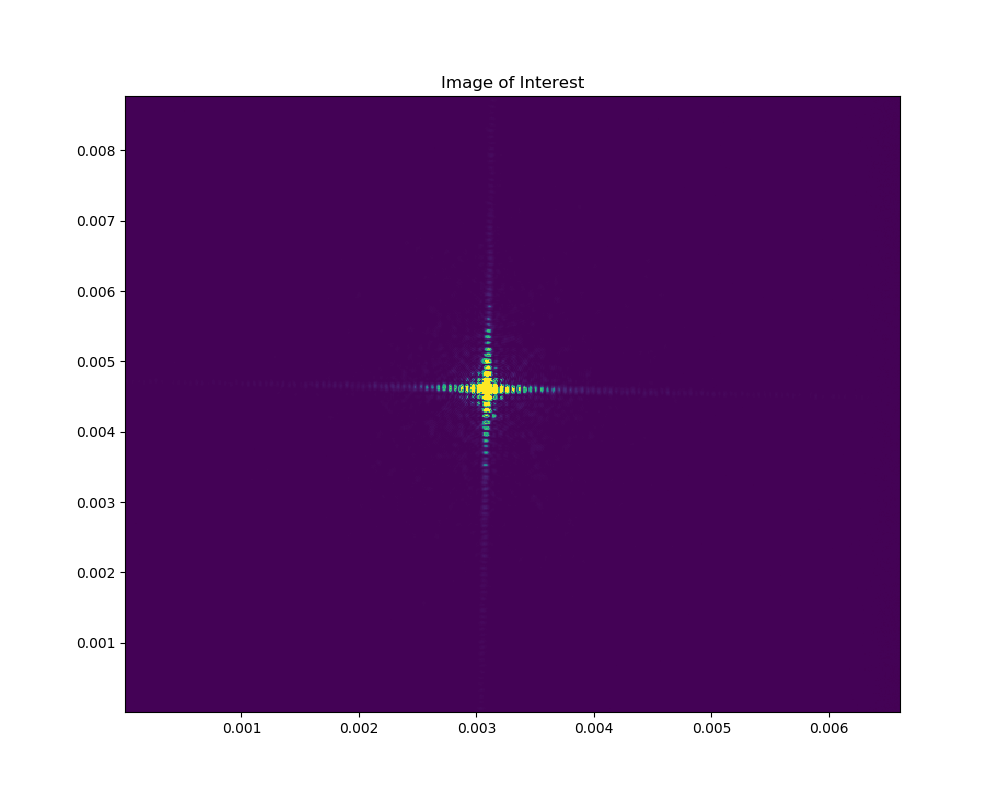

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

y, x, z = get_image_dimensions(p2)
axes.pcolor(y, x, z)
axes.set_title('Image of Interest')

plt.show()

# Plot Simulated

<IPython.core.display.Javascript object>


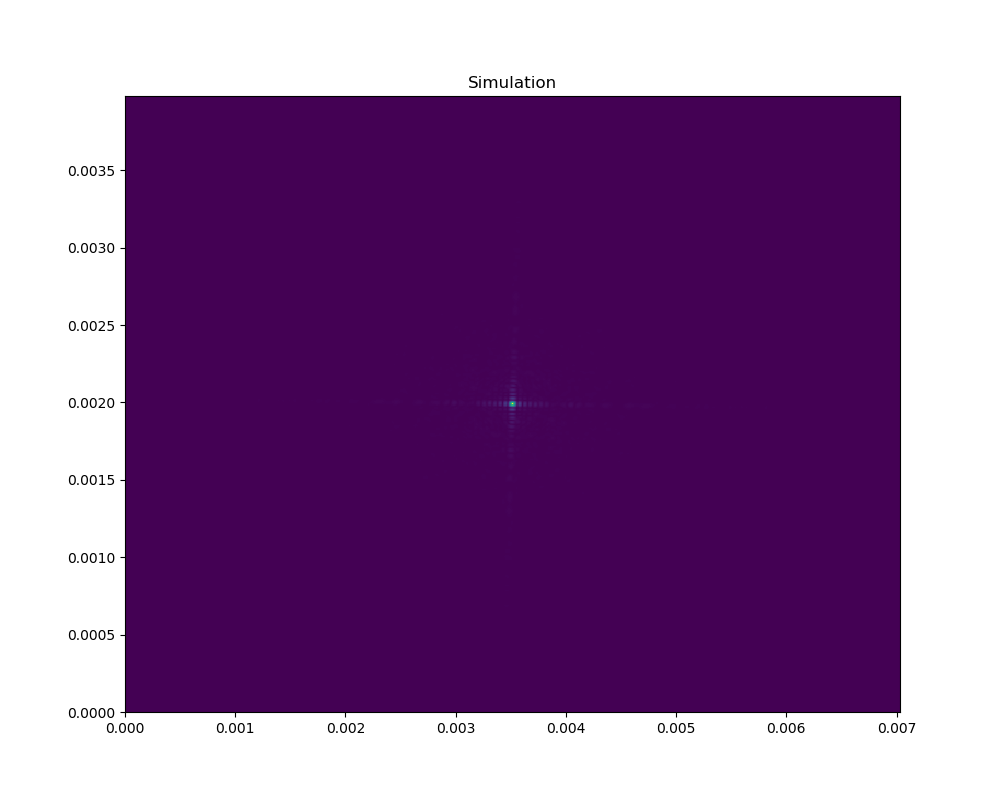

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

y, x, z = get_simulation_dimensions(np.abs(G))
axes.pcolor(y, x, z)
axes.set_title('Simulation')

plt.show()